In [33]:
from typing import List, Dict

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import summarize_features, print_df, convert_numeric_to_float16
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.util_functions import *
from oop_functions.analytics_utils import get_per_thereshold_metrics

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import itertools

from dcurves import dca, plot_graphs


In [2]:
df_cancer_dx = pd.read_csv('https://raw.githubusercontent.com/ddsjoberg/dca-tutorial/main/data/df_cancer_dx.csv')

In [3]:
df_cancer_dx

,patientid,cancer,risk_group,age,famhistory,marker,cancerpredmarker
0,1,0,low,64.03445,0,0.776309,0.037201
1,2,0,high,78.46741,0,0.267086,0.578907
2,3,0,low,64.14617,0,0.169621,0.021551
3,4,0,low,58.53482,0,0.023996,0.003910
4,5,0,low,63.99250,0,0.070910,0.018790
...,...,...,...,...,...,...,...
745,746,0,intermediate,66.09628,0,0.654782,0.057813
746,747,1,intermediate,65.75370,1,1.030259,0.160424
747,748,0,intermediate,70.28287,0,0.151616,0.108838
748,749,0,low,61.32673,0,0.624602,0.015285


In [4]:
dca_famhistory_df = \
    dca(
        data=df_cancer_dx,
        outcome='cancer',
        modelnames=['famhistory']
    )

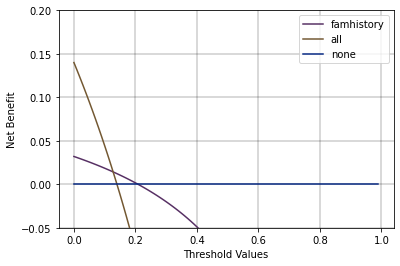

In [5]:

plot_graphs(
    plot_df=dca_famhistory_df,
    graph_type='net_benefit',
    y_limits=[-0.05, 0.2]
)


In [6]:
cv_analytics_utils: Dict[str, CvAnalyticsUtil] = {}

In [34]:
classifiers = {
    # 'LogisticRegression': LogisticRegression(C= 0.25, random_state= 0),
    # 'GaussianNB': GaussianNB(var_smoothing= 1e-09),
    # 'DecisionTreeClassifier': DecisionTreeClassifier(criterion= 'entropy'),
    # 'RandomForestClassifier_entropy': RandomForestClassifier(criterion= 'entropy', n_estimators= 200), # Best one
    'RandomForestClassifier_entropy_300': RandomForestClassifier(criterion= 'entropy', n_estimators= 300), # Best one
    # 'RandomForestClassifier_log_loss': RandomForestClassifier(criterion= 'log_loss', n_estimators= 300),
    # 'RandomForestClassifier_gini': RandomForestClassifier(criterion= 'gini', n_estimators= 300),
    'XGBClassifier_error': XGBClassifier(eval_metric= 'error', learning_rate=0.1),
    'XGBClassifier_logloss': XGBClassifier(eval_metric= 'logloss', learning_rate=0.1), # Best one
    # 'XGBClassifier_rmsle': XGBClassifier(objective='binary:logistic', eval_metric= 'rmsle', learning_rate=0.1),
    # 'XGBClassifier_rmse': XGBClassifier(objective='binary:logistic', eval_metric= 'rmse', learning_rate=0.1),
    # 'XGBClassifier_mae': XGBClassifier(objective='binary:logistic', eval_metric= 'mae', learning_rate=0.1),
    # 'XGBClassifier_mape': XGBClassifier(objective='binary:logistic', eval_metric= 'mape', learning_rate=0.1),
    'XGBClassifier_aucpr': XGBClassifier(eval_metric= 'aucpr', learning_rate=0.1)
}

experiment_data_helpers: List[ExperimentDataHelper] = [
    ExperimentDataHelperSingleLabelScreenedFirst5,    
    # ExperimentDataHelperScreenedFirst5,
    # ExperimentDataHelperNotScreenedColsFirst5,
    # ExperimentDataHelperScreenedColsFirst5,
    # ExperimentDataHelperScreenedOrCancer,
    # ExperimentDataHelperScreened,
    # ExperimentDataHelperNotScreenedCols,
    # ExperimentDataHelperScreenedCols,
    # ExperimentDataHelperAll,
    # ExperimentDataHelperSingleLabelScreenedOrCancer,
    # ExperimentDataHelperSingleLabelScreened,
    # ExperimentDataHelperSingleLabelNotScreenedCols,
    # ExperimentDataHelperSingleLabelScreenedCols,
    # ExperimentDataHelperSingleLabelAll,
    # ExperimentDataHelperScreenedFirst5ca125AndBinary,
    # ExperimentDataHelperScreenedFirst5ca125Binary, 
    # ExperimentDataHelperScreenedFirst5ca125AndBinaryNoResult,

]

In [8]:
# TODO: save propagated source df so that propagation does not have to happen all the time

In [35]:
filesuffixes = []

In [36]:
years = [1]
num_folds=15
test_n_folds=15
train_size = 15000
# [None, 25, 50, 75, 100]
top_k_features = [None]
for classifier_name, classifier in classifiers.items():
    for year in years:
        for experiment_data_helper_class in experiment_data_helpers:
            for top_k in top_k_features:
                label = f'cancer_in_next_{year}_years'
                # label = 'ovar_cancer'
                filesuffix = f'_for_experiment_{experiment_data_helper_class.get_name()}_{classifier_name}_{label}__{num_folds}_trials'
                select_cols = None
                if top_k:
                    select_cols = feature_importance_reader(filesuffix)[:top_k]
                    filesuffix = f'_for_experiment_{experiment_data_helper_class.get_name()}_top_{top_k}_features_{classifier_name}_{label}__{num_folds}_trials'
                print(filesuffix)
                filesuffixes.append(filesuffix)


_for_experiment_participants_screened_single_first_5_RandomForestClassifier_entropy_300_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_XGBClassifier_error_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_XGBClassifier_logloss_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_XGBClassifier_aucpr_cancer_in_next_1_years__15_trials


_for_experiment_participants_screened_single_first_5_RandomForestClassifier_entropy_300_cancer_in_next_1_years__15_trials
Threshold: 0.013333333333333334


Cross-Validation measures:
+--------------------+-----------+-------------+-----------+-----------+
|                    |      mean |         std |       min |       max |
|--------------------+-----------+-------------+-----------+-----------|
| precision__class_0 | 0.999875  | 9.80904e-05 | 0.999718  | 1         |
| recall__class_0    | 0.939899  | 0.0031678   | 0.933755  | 0.946608  |
| f1-score__class_0  | 0.968957  | 0.00166326  | 0.965698  | 0.972527  |
| precision__class_1 | 0.0105041 | 0.0015476   | 0.0075643 | 0.0131148 |
| recall__class_1    | 0.844444  | 0.125682    | 0.625     | 1         |
| f1-score__class_1  | 0.0207483 | 0.0030491   | 0.0149477 | 0.0258481 |
| accuracy           | 0.939827  | 0.00312612  | 0.933713  | 0.946562  |
| auc                | 0.944153  | 0.0605432   | 0.823779  | 0.997954  |
+-------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


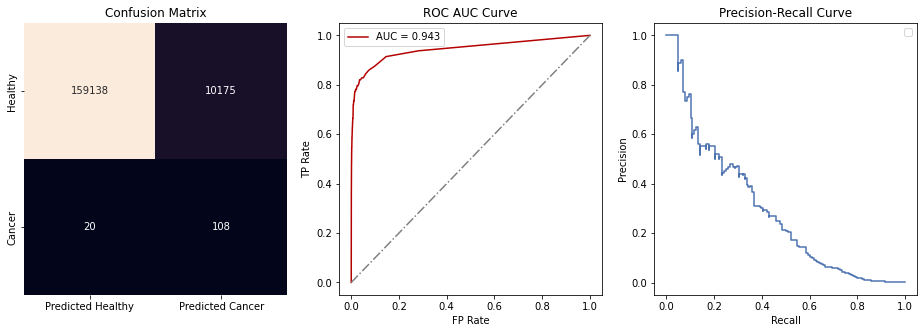

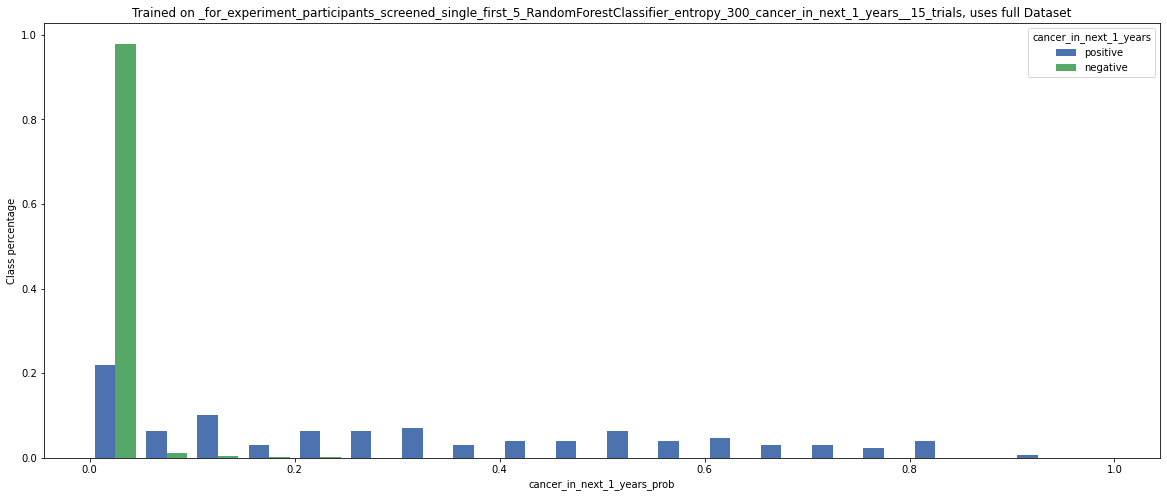

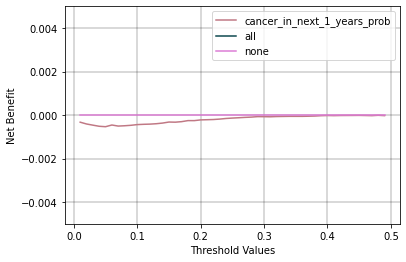

_for_experiment_participants_screened_single_first_5_XGBClassifier_error_cancer_in_next_1_years__15_trials
Threshold: 0.0069644879549741745


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999853   | 0.000113398 | 0.999619   | 1         |
| recall__class_0    | 0.920558   | 0.0101688   | 0.901677   | 0.938982  |
| f1-score__class_0  | 0.958541   | 0.00548786  | 0.948297   | 0.968443  |
| precision__class_1 | 0.00779692 | 0.0013543   | 0.00621891 | 0.0103226 |
| recall__class_1    | 0.821296   | 0.138578    | 0.555556   | 1         |
| f1-score__class_1  | 0.0154435  | 0.00266772  | 0.0123001  | 0.0204082 |
| accuracy           | 0.920483   | 0.0100969   | 0.901747   | 0.938855  |
| auc                | 0.93958    | 0.0423505   | 0.8681     | 0.998399  |
+-----

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


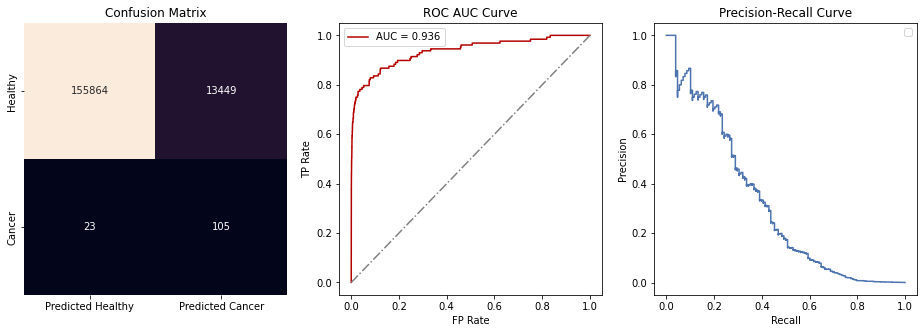

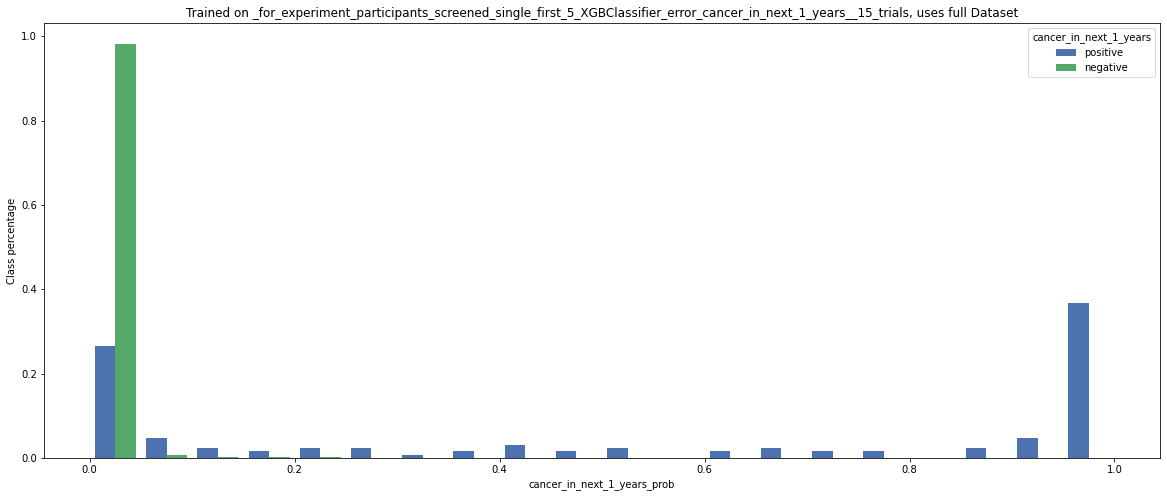

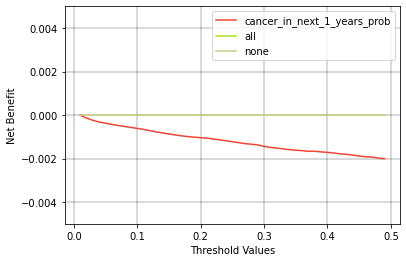

_for_experiment_participants_screened_single_first_5_XGBClassifier_logloss_cancer_in_next_1_years__15_trials
Threshold: 0.00937220361083746


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999849   | 0.000105258 | 0.999624   | 1         |
| recall__class_0    | 0.936553   | 0.00763282  | 0.923868   | 0.949154  |
| f1-score__class_0  | 0.967152   | 0.00404908  | 0.960339   | 0.973782  |
| precision__class_1 | 0.00962204 | 0.00138572  | 0.00757576 | 0.0122699 |
| recall__class_1    | 0.813889   | 0.131112    | 0.555556   | 1         |
| f1-score__class_1  | 0.0190158  | 0.00272901  | 0.0149477  | 0.0242057 |
| accuracy           | 0.93646    | 0.00757958  | 0.923751   | 0.948926  |
| auc                | 0.939228   | 0.0377981   | 0.886461   | 0.998766  |
+-----

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


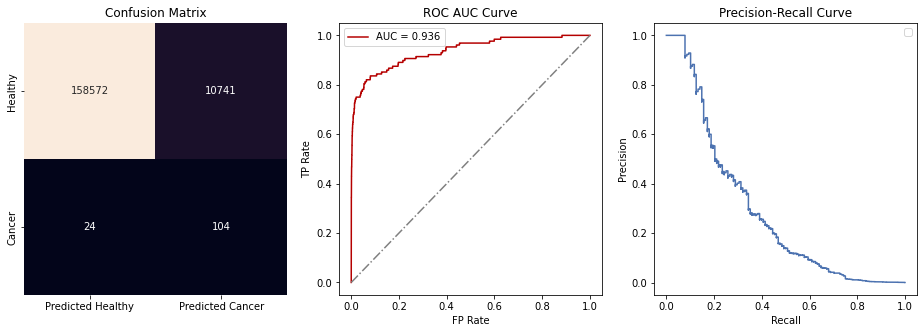

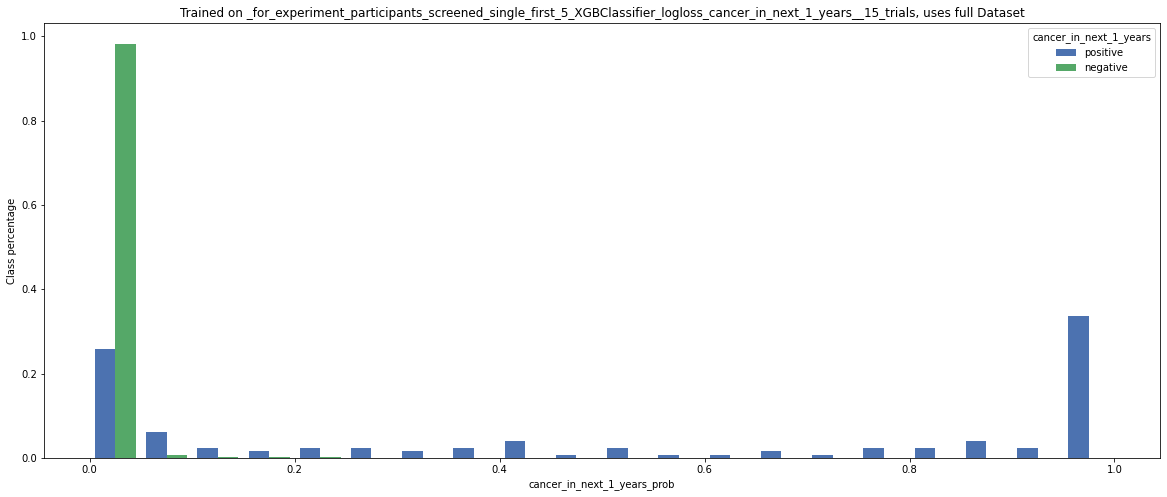

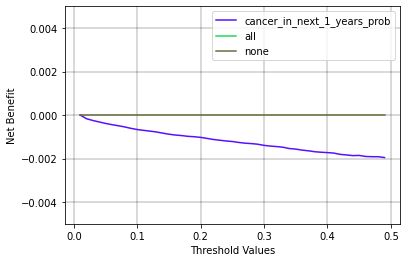

_for_experiment_participants_screened_single_first_5_XGBClassifier_aucpr_cancer_in_next_1_years__15_trials
Threshold: 0.005609586834907532


Cross-Validation measures:
+--------------------+------------+-------------+-----------+------------+
|                    |       mean |         std |       min |        max |
|--------------------+------------+-------------+-----------+------------|
| precision__class_0 | 0.999877   | 9.93398e-05 | 0.999713  | 1          |
| recall__class_0    | 0.901608   | 0.0142119   | 0.880459  | 0.92842    |
| f1-score__class_0  | 0.948148   | 0.00780536  | 0.93643   | 0.962749   |
| precision__class_1 | 0.00654837 | 0.000828802 | 0.0054407 | 0.00821355 |
| recall__class_1    | 0.852778   | 0.121172    | 0.625     | 1          |
| f1-score__class_1  | 0.012994   | 0.00163327  | 0.0107875 | 0.0162767  |
| accuracy           | 0.90157    | 0.0141319   | 0.880544  | 0.928211   |
| auc                | 0.942088   | 0.0409814   | 0.858247  | 0.997435   |
+------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


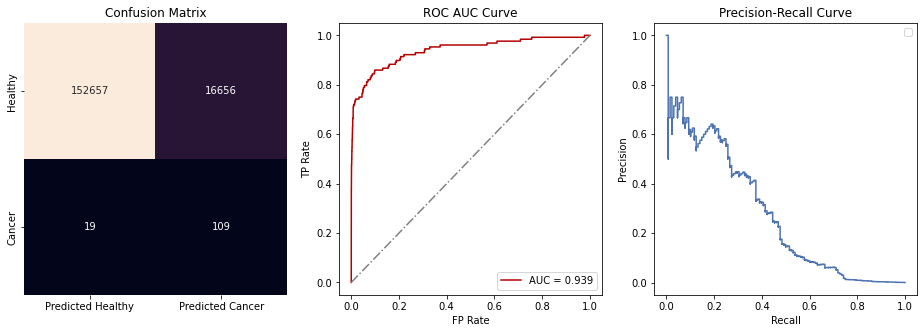

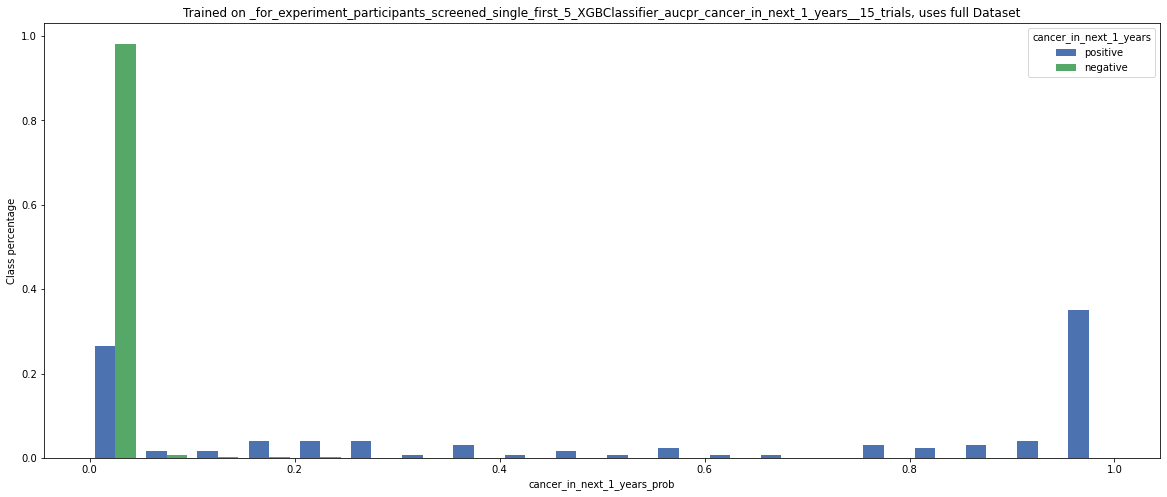

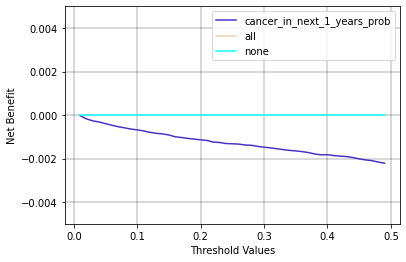

In [39]:
for filesuffix in filesuffixes:
    cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)
    print(filesuffix)
    cv_analytics_utils[filesuffix] = cv_analytics_util
    threshold = cv_analytics_util.get_optimal_operating_point()
    print(f"Threshold: {threshold}")
    cv_analytics_util.update_thresholds(threshold)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    label = cv_analytics_util.get_label()
    full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = label)
    plot_hist_side_by_side_for_class(full_dataset, label, f'{label}_prob', normalize = True, title=f'Trained on {filesuffix}, uses full Dataset')
    dca_obj = dca(full_dataset, outcome=label, modelnames=[f'{label}_prob'], thresholds=np.arange(0.01, 0.5, 0.01))
    plot_graphs(
        plot_df=dca_obj,
        graph_type='net_benefit',
        y_limits=[-0.005, 0.005]
    )
    dca_obj.to_csv(f"./threshold_selection/dca_curve{filesuffix}.csv")
    get_per_thereshold_metrics(full_dataset, f'{label}_prob', label).to_csv(f"./threshold_selection/threshold_metrics{filesuffix}.csv")


In [12]:
threshold

0.011354881338775158

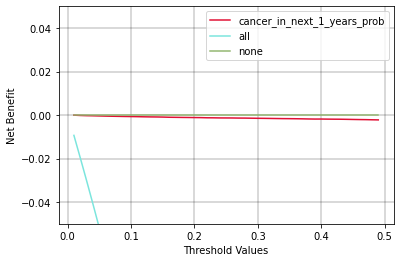

In [40]:
dca_obj = dca(full_dataset, outcome=label, modelnames=[f'{label}_prob'], thresholds=np.arange(0.01, 0.5, 0.01))
plot_graphs(
    plot_df=dca_obj,
    graph_type='net_benefit',
    y_limits=[-0.05, 0.05]
)

In [14]:
full_dataset[full_dataset[label].isin([True])]

,plco_id,arthrit_f,bmi_20,bmi_50,bmi_curr,bronchit_f,brothers,ca125_result,ca125ii_level,ca125ii_level_binary,...,study_yr,tvu_ref,tvu_result,uterine_fib,visboth,visl,was_screened,weight50_f,cancer_in_next_1_years_pred,cancer_in_next_1_years_prob
228,A-008936-9,0.0,17.718750,22.140625,23.906250,0.0,0.0,2.0,1401.000000,2.000000,...,0.0,1.000000,2.0,0.0,0.0,0.0,1.0,125.0,1,0.992284
1423,A-038636-9,1.0,17.359375,17.718750,19.843750,0.0,2.0,1.0,19.000000,1.000000,...,2.0,4.000000,1.0,0.0,1.0,1.0,1.0,100.0,0,0.005653
3063,A-067193-4,1.0,19.734375,23.484375,28.187500,0.0,1.0,2.0,839.000000,2.000000,...,0.0,2.000000,3.0,0.0,0.0,1.0,1.0,150.0,1,0.989213
3211,A-069164-3,1.0,22.500000,24.687500,27.984375,0.0,0.0,1.0,5.000000,1.000000,...,4.0,3.460938,9.0,1.0,0.0,0.0,1.0,135.0,1,0.670996
3806,A-077660-1,0.0,24.125000,26.625000,27.453125,0.0,1.0,1.0,9.000000,1.000000,...,1.0,1.000000,2.0,0.0,0.0,0.0,1.0,160.0,1,0.651080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,Z-105757-1,0.0,18.296875,21.625000,23.296875,0.0,2.0,2.0,73.000000,2.000000,...,3.0,4.000000,1.0,1.0,0.0,0.0,1.0,130.0,0,0.097501
9655,Z-138157-4,0.0,20.375000,24.437500,27.093750,0.0,1.0,9.0,12.242188,1.016602,...,-1.0,3.460938,1.0,1.0,0.0,0.0,1.0,138.0,1,0.947677
9797,Z-139804-0,1.0,25.109375,32.500000,36.906250,0.0,4.0,1.0,8.000000,1.000000,...,0.0,1.000000,2.0,1.0,0.0,1.0,1.0,220.0,0,0.014173
10316,Z-148291-8,0.0,23.171875,23.171875,24.031250,0.0,1.0,1.0,20.000000,1.000000,...,1.0,4.000000,4.0,0.0,0.0,0.0,1.0,135.0,0,0.036014


In [15]:
print_df(dca_obj)

+-----+-----------------------------+-------------+--------+--------------+--------+-----------------+-------------+------------+---------------+----------------------------+
|     | model                       |   threshold |      n |   prevalence |   harm |   test_pos_rate |     tp_rate |    fp_rate |   net_benefit |   net_intervention_avoided |
|-----+-----------------------------+-------------+--------+--------------+--------+-----------------+-------------+------------+---------------+----------------------------|
|   0 | cancer_in_next_1_years_prob |        0.01 | 169441 |  0.000755425 |      0 |      0.0686316  | 0.000655095 | 0.0679765  |  -3.15357e-05 |                   0.921335 |
|   1 | cancer_in_next_1_years_prob |        0.02 | 169441 |  0.000755425 |      0 |      0.0433012  | 0.000619685 | 0.0426815  |  -0.000251367 |                   0.949912 |
|   2 | cancer_in_next_1_years_prob |        0.03 | 169441 |  0.000755425 |      0 |      0.0329613  | 0.000613783 | 0.032347